# CEH 10m Vs PDNP 12.5cm

#### Data

* 10 m Classified Pixel CEH (most detailed LC from CEH) **LCM_CEH_21**
10 m Classified Pixels have not been generalised by combination with the UKCEH Land Parcel Spatial Framework. This preserves intricate features of the landscape such as narrow linear features and small patches of habitat that fall below the 0.5 hectare minimum mappable unit (MMU) of the UKCEH Land Parcel Spatial Framework

* 12.5 cm Pixel PDNPA **LCM_PDNP_23**
Currently non dissolved data



In [81]:
# Import Libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import numpy as np
from geocube.api.core import make_geocube
import pylandstats as pls
from rasterio.enums import MergeAlg

In [82]:
# Load the shp files (transfer to shapley later)
PDNP_23 = gpd.read_file("C:/Users/alexad/Desktop/lcm/pdnp_23_SK0857.shp") 
CEH_21 = gpd.read_file("C:/Users/alexad/Desktop/lcm/LCM_21_SK0857.shp") 

In [83]:
# create a dict of key
CEH_key = {1: 'Broadleaved woodland',
           2: 'Coniferous woodland',
           3: 'Arable and horticulture',
           4: 'Improved grassland',
           5: 'Neutral grassland',
           6: 'Calcareous grassland',
           7: 'Acid grassland',
           9: 'Fen, marsh and swamp',
           12: 'Inland rock',
           14: 'Fresh water',
           21: 'Suburban'
           }

In [119]:
# create a dict of key try to map to CEH
PDNP_key = {'Blanket Peat Grass Moor': 90,
           'Bracken': 91,
           'Broadleaved High Forest': 1,
           'Clear Felled/New Plantings in Forest Areas': 92,
           'Coniferous High Forest': 2,
           'Improved Pasture': 4,
           'Major Transport Routes': 21,
           'Open Water, Inland': 14,
           'Other Isolated Rural Developments (>0.25 ha)': 21,
           'Quarries and Mineral Workings': 21,
           'Rough Pasture': 5,
           'Scrub': 93,
           'Upland Heath': 94,
           'Upland Heath/Blanket Peat Mosaic': 95,
           'Urban': 21,
           'Wetland, Wet Grassland and Rush Pasture': 96
           } 

In [120]:
# map CEH code to name column
CEH_21['name'] = CEH_21['gridcode'].map(CEH_key)
# map PDNP name to code column
PDNP_23['code'] = PDNP_23['Class_name'].map(PDNP_key)

In [86]:
print(PDNP_23.Class_name.unique())

['Improved Pasture' 'Rough Pasture' 'Scrub' 'Broadleaved High Forest'
 'Coniferous High Forest' 'Upland Heath'
 'Wetland, Wet Grassland and Rush Pasture' 'Blanket Peat Grass Moor'
 'Upland Heath/Blanket Peat Mosaic'
 'Clear Felled/New Plantings in Forest Areas' 'Open Water, Inland'
 'Major Transport Routes' 'Quarries and Mineral Workings' 'Urban'
 'Other Isolated Rural Developments (>0.25 ha)' 'Bracken']


In [87]:
CEH_Palette = {'Broadleaved woodland' : 'forestgreen',
           'Coniferous woodland' : 'darkgreen',
           'Arable and horticulture' : 'peru',
           'Improved grassland' : 'lime',
           'Neutral grassland' : 'seagreen',
           'Calcareous grassland' : 'gold',
           'Acid grassland' : 'yellow',
           'Fen, marsh and swamp' : 'darkblue',
           'Inland rock' : 'grey',
           'Fresh water' : 'blue',
           'Suburban' : 'black'
           } 

In [88]:
PDNP_Palette = {'Blanket Peat Grass Moor' : 'forestgreen',
           'Bracken' : 'yellow',
           'Broadleaved High Forest' : 'forestgreen',
           'Clear Felled/New Plantings in Forest Areas' : 'grey',
           'Coniferous High Forest' : 'darkgreen',
           'Improved Pasture' : 'lime',
           'Major Transport Routes' : 'black',
           'Open Water, Inland' : 'blue',
           'Other Isolated Rural Developments (>0.25 ha)' : 'black',
           'Quarries and Mineral Workings' : 'black',
           'Rough Pasture' : 'seagreen',
           'Scrub' : 'turquoise',
           'Upland Heath' : 'purple',
           'Upland Heath/Blanket Peat Mosaic' : 'hotpink',
           'Urban' : 'black',
           'Wetland, Wet Grassland and Rush Pasture' : 'red'
           } 

C:\Users\alexad\AppData\Local\Temp\ipykernel_19540\1952144422.py:4: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  CEH_custom_patch = [Patch([0], [0], color=color) for color in CEH_Palette.values()]
C:\Users\alexad\AppData\Local\Temp\ipykernel_19540\1952144422.py:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  PDNP_custom_patch = [Patch([0], [0], color=color) for color in PDNP_Palette.values()]
c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


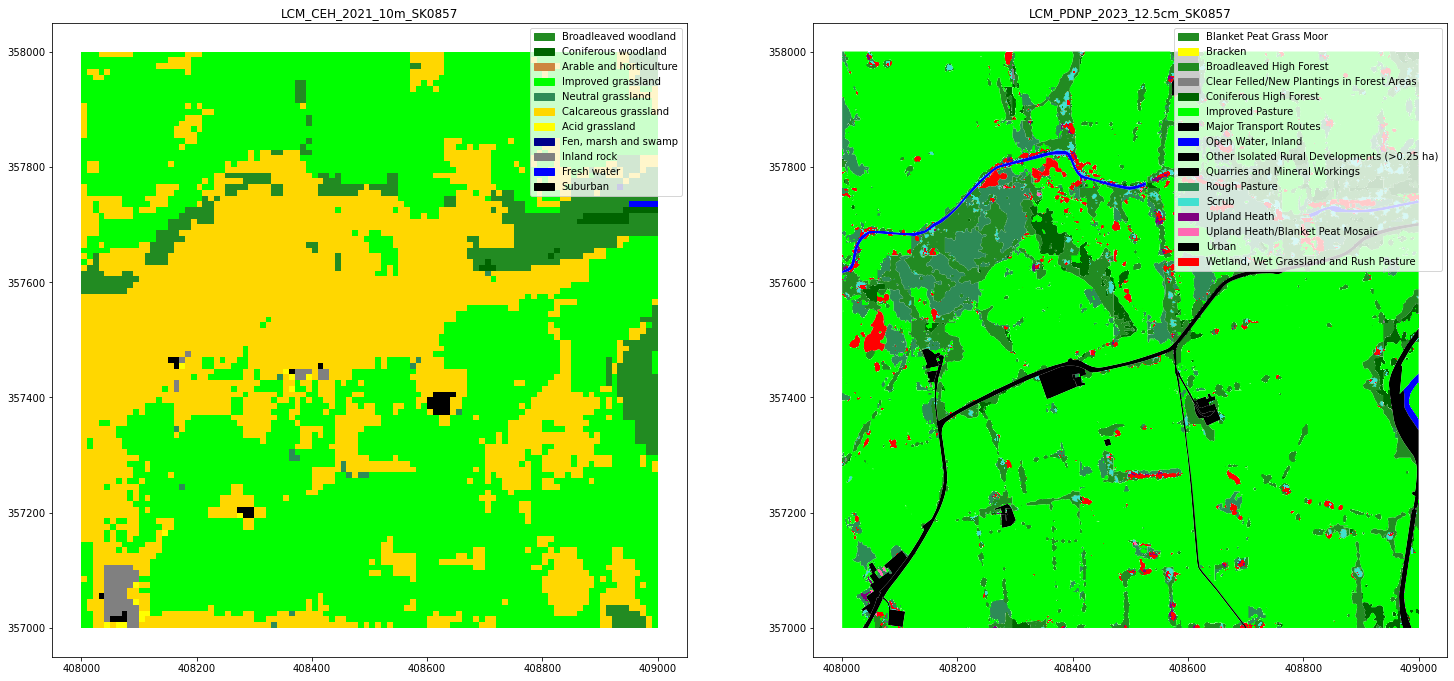

In [89]:
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

# add manual legend
CEH_custom_patch = [Patch([0], [0], color=color) for color in CEH_Palette.values()]
PDNP_custom_patch = [Patch([0], [0], color=color) for color in PDNP_Palette.values()]

CEH_21.plot('name', color=  CEH_21['name'].map(CEH_Palette), legend = True, ax=axes[0]);
PDNP_23.plot('Class_name', color = PDNP_23['Class_name'].map(PDNP_Palette), legend = True, ax=axes[1]);
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

ax=axes[0].legend(CEH_custom_patch, CEH_Palette.keys())
ax=axes[1].legend(PDNP_custom_patch, PDNP_Palette.keys())

# random AF wtf Legend placement doesn't work with custom colours :( vdplasthijs help me :) 
    
# axes[0].legend(bbox_to_anchor=(1, 0.5))
# axes[1].legend(bbox_to_anchor=(1, 0.5))
# or
#CEH_21.plot('gridcode', color=  CEH_21['gridcode'].map(CEH_Palette), legend = True, ax=axes[0], legend_kwds={'bbox_to_anchor': (1, -0.05)});
#PDNP_23.plot('Class_name', color = PDNP_23['Class_name'].map(PDNP_Palette), legend = True, ax=axes[1], legend_kwds={'bbox_to_anchor': (1, -0.05)});


#### Isolate Broadleaved 

In [90]:
# subset the data
broadleaf_CEH = CEH_21[CEH_21['name'] == 'Broadleaved woodland']
broadleaf_PDNP = PDNP_23[PDNP_23['Class_name'] == 'Broadleaved High Forest']

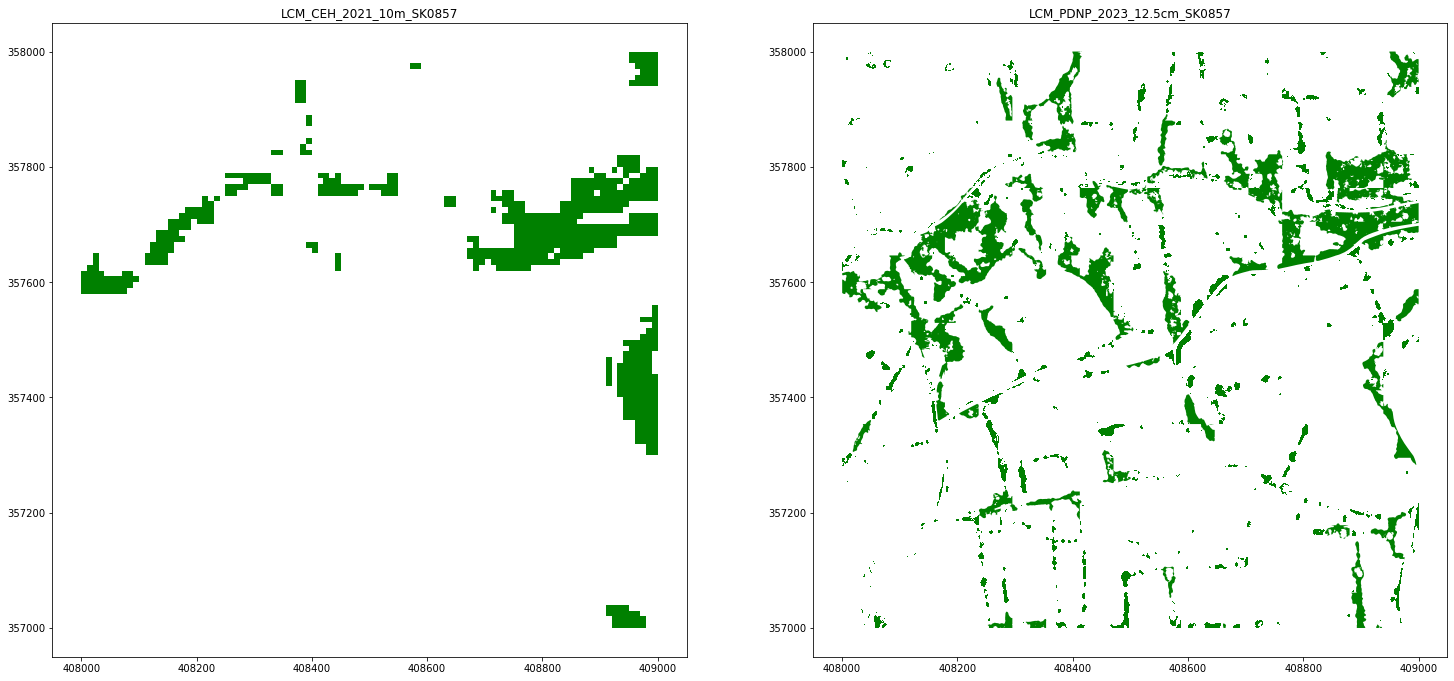

In [91]:
# plot woodland
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

broadleaf_CEH.plot('name', color= 'green', ax=axes[0])
broadleaf_PDNP.plot('Class_name', color = 'green', ax=axes[1])
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

##### Use vdplasthijs code here instead of pylandstats https://github.com/pdnpa/cnn-land-cover/blob/main/notebooks/Figure%20Rush%20pasture.ipynb

# Patch analysis

Need to covert to raster for pylandstats

In [130]:
# create the CEH raster
CEH_r = make_geocube(
    vector_data=CEH_21, 
    measurements=['gridcode'],
    resolution=(-10,10),
    fill=0)
    # save the tiff
CEH_r['gridcode'].rio.to_raster("C:/Users/alexad/Desktop/lcm/CEH.tif")

In [138]:
# create the PDNP raster
CEH_r = make_geocube(
    vector_data=PDNP_23, 
    measurements=['code'],
    resolution=(-0.1, 0.1),
    fill=0)
    # save the tiff
CEH_r['code'].rio.to_raster("C:/Users/alexad/Desktop/lcm/PDNP.tif")

In [139]:
CEH = pls.Landscape("C:/Users/alexad/Desktop/lcm/CEH.tif")
PDNP = pls.Landscape("C:/Users/alexad/Desktop/lcm/PDNP.tif")

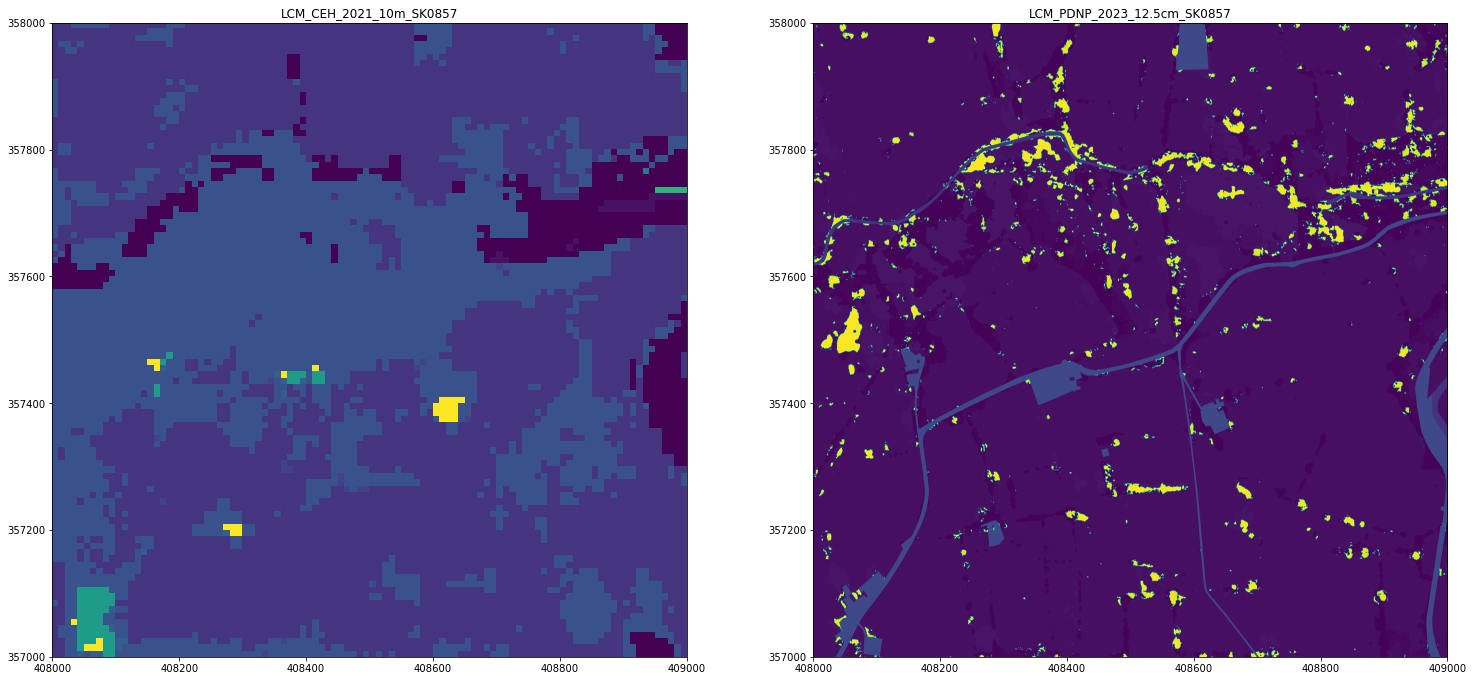

In [140]:
fig, axes = plt.subplots(ncols=2, figsize=(25, 25))

CEH.plot_landscape(ax=axes[0])
PDNP.plot_landscape(ax=axes[1])
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNP_2023_12.5cm_SK0857')

In [144]:
# Compute pandas data frames of landscape metrics at the patch, class and landscape level
CEH_metrics_df = CEH.compute_class_metrics_df(
    metrics=["proportion_of_landscape", "edge_density", "euclidean_nearest_neighbor_mn"]
)
# map CEH code to name column
#CEH_metrics_df['name'] = CEH_metrics_df['class_val'].map(CEH_key)
CEH_metrics_df

c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 9.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\pylandstats\landscape.py:1078: RuntimeWarning: Class 14.0 has less than 2 patches. Euclidean-nearest-neighbor might contain nan values
  warnings.warn(


,proportion_of_landscape,edge_density,euclidean_nearest_neighbor_mn
class_val,,,
1.0,6.44,53.5,56.697080
2.0,0.29,5.1,76.680958
4.0,55.94,196.4,27.057761
5.0,0.17,5.9,85.784407
6.0,36.01,224.7,27.148712
7.0,0.15,5.1,54.670170
9.0,0.01,0.4,NaN
12.0,0.64,7.2,88.523665
14.0,0.05,1.1,NaN


In [145]:
# Compute pandas data frames of landscape metrics at the patch, class and landscape level
PDNP_metrics_df = PDNP.compute_class_metrics_df(
    metrics=["proportion_of_landscape", "edge_density", "euclidean_nearest_neighbor_mn"]
)
PDNP_metrics_df

KeyboardInterrupt: 